# Capstone Project - Data Science @ BrainStation

##  Introduction

This Jupiter notebook forms the core component of my Capstone project under the Data Science Diploma Program at BrainStation, Vancouver. In this notebook, we use base Python together with some of the widely used libraries to investigate, analyse a dataset sourced from loan data released by Lending Club, a US-based peer-to-peer lender. At it's peak, Lending club was largest P2P lender in the world with assets of ~16 billion USD. The dataset contains the features of various loans extended by Lending Club spanning from 2007 and 2018 and the corresponding details of the borrowers, who had availed the loan. The key detail of the loan captured in the dataset is 'loan_status', which has two values 'Fully Paid' or 'Charged Off', which means all these loans have been closed and there are no running loans in this dataset.

The dataset was obtained from [Kaggle](https://www.kaggle.com/datasets/jeandedieunyandwi/lending-club-dataset/code?datasetId=608703&sortBy=voteCount).

In this note, I will be demonstrating how to perform EDA, visualise data, and apply some machine learning techniques to solves problem of prediction.


### Data Dictionary

| S.No | Column Name           | Description                                                                                                 |
|------|-----------------------|-------------------------------------------------------------------------------------------------------------|
| 0    | loan_amount           | The listed amount of the loan in USD applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.|
| 1    | term                  | The number of payments on the loan. Values are in months and can be either 36 or 60.                          |
| 2    | int_rate              | Interest Rate on the loan                                                                                    |
| 3    | installment           | The monthly payment owed by the borrower if the loan originates.                                            |
| 4    | grade                 | LC assigned loan grade                                                                                      |
| 5    | sub_grade             | LC assigned loan subgrade                                                                                   |
| 6    | emp_title             | The job title supplied by the Borrower when applying for the loan.*                                           |
| 7    | emp_length            | Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.|
| 8    | home_ownership        | The homeownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER|
| 9    | annual_inc            | The self-reported annual income provided by the borrower during registration.                                 |
| 10   | verification_status   | Indicates if income was verified by LC, not verified, or if the income source was verified                    |
| 11   | issue_d               | The month which the loan was funded                                                                         |
| 12   | loan_status           | Current status of the loan                                                                                 |
| 13   | purpose               | A category provided by the borrower for the loan request.                                                   |
| 14   | title                 | The loan title provided by the borrower                                                                    |
| 15   | zip_code              | The first 3 numbers of the zip code provided by the borrower in the loan application.                         |
| 16   | addr_state            | The state provided by the borrower in the loan application                                                  |
| 17   | dti                   | A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.|
| 18   | earliest_cr_line      | The month the borrower's earliest reported credit line was opened                                            |
| 19   | open_acc              | The number of open credit lines in the borrower's credit file.                                               |
| 20   | pub_rec               | Number of derogatory public records                                                                        |
| 21   | revol_bal             | Total credit revolving balance                                                                             |
| 22   | revol_util            | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.|
| 23   | total_acc             | The total number of credit lines currently in the borrower's credit file                                     |
| 24   | initial_list_status   | The initial listing status of the loan. Possible values are – W, F. W stands for Whole loan and F stands for fractional.                                           |
| 25   | application_type      | Indicates whether the loan is an individual application or a joint application with two co-borrowers         |
| 26   | mort_acc              | Number of mortgage accounts.                                                                               |
| 27   | pub_rec_bankruptcies  | Number of public record bankruptcies 

In [73]:
import numpy as np # Linear alzebra
import pandas as pd # Data manipulation

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [74]:
raw_df = pd.read_csv("lending_club_loan_two.csv")

In [75]:
raw_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [76]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

**Datatypes:** Column 'Term' could transformed from object to numeric.

**Extraction of Data from existing columns**: We could extract multiple columns from date column (month and year) and address column (city,state)



In [77]:
raw_df['issue_d']

0         Jan-2015
1         Jan-2015
2         Jan-2015
3         Nov-2014
4         Apr-2013
            ...   
396025    Oct-2015
396026    Feb-2015
396027    Oct-2013
396028    Aug-2012
396029    Jun-2010
Name: issue_d, Length: 396030, dtype: object

In [78]:
raw_df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


1. **loan_amount** The average loan is 14111 USD. Min loan amount is 500 USD and max is 40,000 USD
2. **int_rate**	The interest rate on an average is 13.63%

In [79]:
raw_df.shape # Checking for number of rows and columns

(396030, 27)

There are 396k rows with 27 columns in this dataset

In [80]:
# Checking for null values
raw_df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

There are null values in columns emp_title, emp_length, title, revol_util, mort_acc, pub_rec_bankruptcies. Null values to be handled subsequently. 

In [81]:
raw_df.duplicated().sum() # checking for duplicate rows

0

There are no duplicates rows in the dataset.

In [82]:
#raw_df.T # checking for duplicate columns

In [83]:
# Checking to see top 20 most occuring values in column 'emp_title'
raw_df['emp_title'].value_counts()[0:20]

Teacher                     4389
Manager                     4250
Registered Nurse            1856
RN                          1846
Supervisor                  1830
Sales                       1638
Project Manager             1505
Owner                       1410
Driver                      1339
Office Manager              1218
manager                     1145
Director                    1089
General Manager             1074
Engineer                     995
teacher                      962
driver                       882
Vice President               857
Operations Manager           763
Administrative Assistant     756
Accountant                   748
Name: emp_title, dtype: int64

In [84]:
#raw_df['emp_title'].value_counts().plot(kind = 'barh')
#plt.show()

In [85]:
(raw_df['emp_title'].nunique()*100/raw_df['emp_title'].count()).round(1)

46.4

46.39% of values in the columns are unique values. Since there are way too many number of uniques values of employment titles, we may have to drop the columns, as it becomes difficult to 'groupby' categories.

The top 10 most freuquent categories of employee titles form only 5.7% of the total count of titles.  Had the most frequent values constituted a good portion of the dataset, we could have filled have classified the remaining values as 'other'

In [86]:
raw_df['emp_length'].unique() 

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

We need to further explore on how to handle missing values in employment length.

In [87]:
raw_df['title'].value_counts()[:20] # Calculating the top 20 most frequently ocurring categories in column 'title'

Debt consolidation           152472
Credit card refinancing       51487
Home improvement              15264
Other                         12930
Debt Consolidation            11608
Major purchase                 4769
Consolidation                  3852
debt consolidation             3547
Business                       2949
Debt Consolidation Loan        2864
Medical expenses               2742
Car financing                  2139
Credit Card Consolidation      1775
Vacation                       1717
Moving and relocation          1689
consolidation                  1595
Personal Loan                  1591
Consolidation Loan             1299
Home Improvement               1268
Home buying                    1183
Name: title, dtype: int64

It looks like there are many duplicated categories. For instance, Debt consolidation is captured as different values. We 

In [88]:
raw_df['title'].nunique() 

48817

Number of unique values is huge. We need to handle this.

In [89]:
(raw_df.isna().sum(axis=0)*100/raw_df.shape[0]).round(1) # calculating percentage of nulls in all columns

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_title               5.8
emp_length              4.6
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
title                   0.4
dti                     0.0
earliest_cr_line        0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.1
total_acc               0.0
initial_list_status     0.0
application_type        0.0
mort_acc                9.5
pub_rec_bankruptcies    0.1
address                 0.0
dtype: float64

**Column 'emp_title'**: 5.8% of values missing the column.

**Column 'emp_length'**: 4.60% of values missing in the column. Most of the rows where emp_title is missing, also has emp_lenth missing. We need to further explore on how to handle missing values in employment length.

**Column 'mort_acc'**: 10% of values of column capturing 'number of mortgage accounts' or 'mort_acc' is missing. We need to decide how to handle these null values, as 10% is a considerable number.

**Column 'pub_rec_bankruptcies'**: A very small number of values are missing for number of public records of bankruptcies. We will need to figure out how to best handle these missing values. However, the number if missing values is very small. We can afford to delete these rows. 

In [90]:
# Bifurcating into numeric and categorical data frames for plot distributions
 
numeric_df = raw_df.select_dtypes("number")
categorical_df = raw_df.select_dtypes("object")

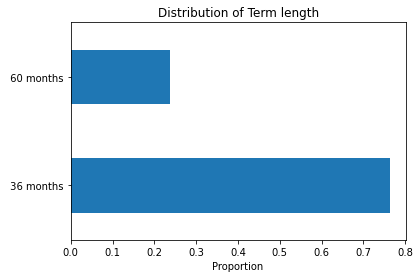

In [91]:
raw_df["term"].value_counts(dropna=False, normalize=True).plot(kind="barh")
plt.title("Distribution of Term length")
plt.xlabel("Proportion")
plt.show()

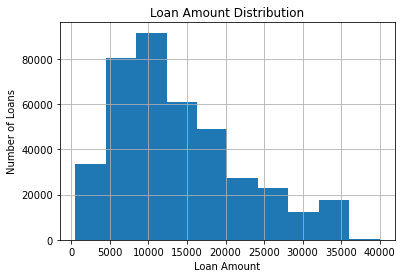

In [92]:
raw_df['loan_amnt'].hist(bins=10)

# Adding labels
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Number of Loans')

plt.show()

1. Maximum loans are in the range of 5k to 12.5k USD.
2. Minimum loans are extended in range of 27k to 32k USD.


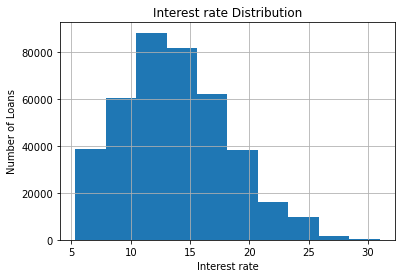

In [93]:
raw_df['int_rate'].hist(bins = 10)

# Adding labels
plt.title('Interest rate Distribution')
plt.xlabel('Interest rate')
plt.ylabel('Number of Loans')

plt.show()

Most loans are in the range of 11% to 16%. The loans above 21% taper off.

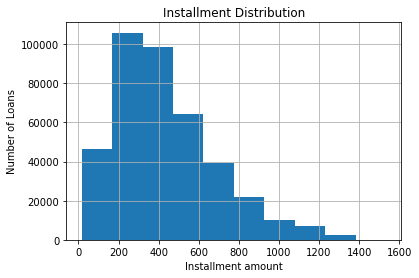

In [96]:
raw_df['installment'].hist(bins = 10)

# Adding labels
plt.title('Installment Distribution')
plt.xlabel('Installment amount')
plt.ylabel('Number of Loans')

plt.show()

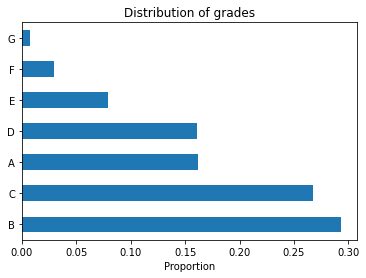

In [97]:


raw_df['grade'].value_counts(dropna=False, normalize=True).plot(kind="barh")
plt.title("Distribution of grades")
plt.xlabel("Proportion")
plt.show()

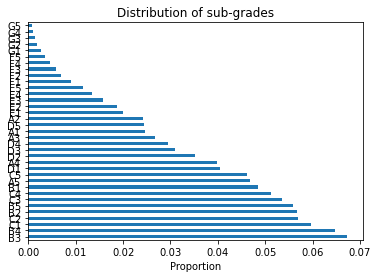

In [98]:
raw_df['sub_grade'].value_counts(dropna=False, normalize=True).plot(kind="barh")
plt.title("Distribution of sub-grades")
plt.xlabel("Proportion")
plt.show()

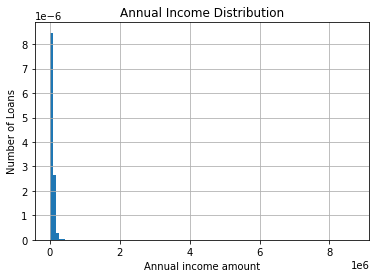

In [106]:
raw_df['annual_inc'].hist(bins = 100, density= True)

# Adding labels
plt.title('Annual Income Distribution')
plt.xlabel('Annual income amount')
plt.ylabel('Number of Loans')

plt.show()

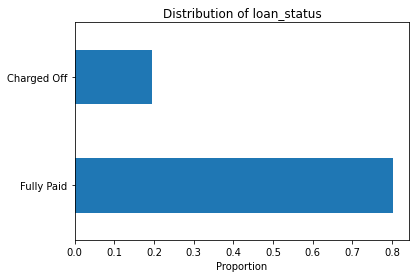

In [107]:
raw_df['loan_status'].value_counts(dropna=False, normalize=True).plot(kind="barh")
plt.title("Distribution of loan_status")
plt.xlabel("Proportion")
plt.show()

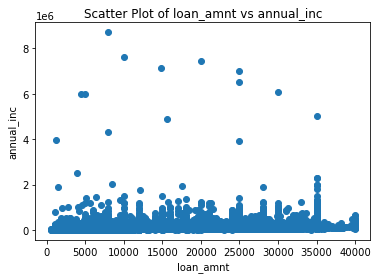

In [110]:

plt.scatter(raw_df['loan_amnt'], raw_df['annual_inc'])


plt.title('Scatter Plot of loan_amnt vs annual_inc')
plt.xlabel('loan_amnt')
plt.ylabel('annual_inc')

# Show the plot
plt.show()

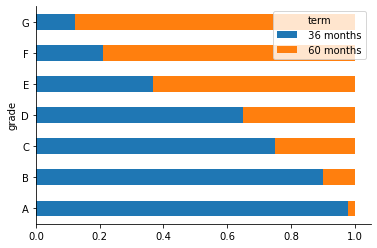

In [119]:
rates = raw_df.groupby(["grade", "term"])["term"].count()/raw_df.groupby(["grade"])["term"].count()
rates.unstack().plot(kind="barh", stacked=True)
sns.despine()